In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import mutual_info_classif
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [2]:
df=pd.read_csv(r"C:\Users\peter.PETR\Documents\python2\early code project\data_science_salaries.csv")
df.tail()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
6594,Staff Data Analyst,Entry-level,Contract,Hybrid,2020,Canada,60000,CAD,44753,Canada,Large
6595,Staff Data Analyst,Executive-level,Full-time,On-site,2020,Nigeria,15000,USD,15000,Canada,Medium
6596,Machine Learning Manager,Senior-level,Full-time,Hybrid,2020,Canada,157000,CAD,117104,Canada,Large
6597,Data Engineer,Mid-level,Full-time,Hybrid,2020,Austria,65000,EUR,74130,Austria,Large
6598,Data Scientist,Senior-level,Full-time,On-site,2020,Austria,80000,EUR,91237,Austria,Small


In [3]:
df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


In [4]:
df.isnull().sum()/df.shape[0]*100

job_title             0.0
experience_level      0.0
employment_type       0.0
work_models           0.0
work_year             0.0
employee_residence    0.0
salary                0.0
salary_currency       0.0
salary_in_usd         0.0
company_location      0.0
company_size          0.0
dtype: float64

In [5]:
df.columns

Index(['job_title', 'experience_level', 'employment_type', 'work_models',
       'work_year', 'employee_residence', 'salary', 'salary_currency',
       'salary_in_usd', 'company_location', 'company_size'],
      dtype='object')

In [6]:
df.isnull().sum()

job_title             0
experience_level      0
employment_type       0
work_models           0
work_year             0
employee_residence    0
salary                0
salary_currency       0
salary_in_usd         0
company_location      0
company_size          0
dtype: int64

In [7]:
df.describe()

,work_year,salary,salary_in_usd
count,6599.000000,6.599000e+03,6599.000000
mean,2022.818457,1.792833e+05,145560.558569
std,0.674809,5.263722e+05,70946.838070
min,2020.000000,1.400000e+04,15000.000000
25%,2023.000000,9.600000e+04,95000.000000
50%,2023.000000,1.400000e+05,138666.000000
75%,2023.000000,1.875000e+05,185000.000000
max,2024.000000,3.040000e+07,750000.000000


In [8]:
df.columns

Index(['job_title', 'experience_level', 'employment_type', 'work_models',
       'work_year', 'employee_residence', 'salary', 'salary_currency',
       'salary_in_usd', 'company_location', 'company_size'],
      dtype='object')

In [9]:
df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6599 non-null   object
 1   experience_level    6599 non-null   object
 2   employment_type     6599 non-null   object
 3   work_models         6599 non-null   object
 4   work_year           6599 non-null   int64 
 5   employee_residence  6599 non-null   object
 6   salary              6599 non-null   int64 
 7   salary_currency     6599 non-null   object
 8   salary_in_usd       6599 non-null   int64 
 9   company_location    6599 non-null   object
 10  company_size        6599 non-null   object
dtypes: int64(3), object(8)
memory usage: 567.2+ KB


In [11]:
df["work_year"]=pd.to_datetime(df["work_year"]).dt.year

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6599 non-null   object
 1   experience_level    6599 non-null   object
 2   employment_type     6599 non-null   object
 3   work_models         6599 non-null   object
 4   work_year           6599 non-null   int32 
 5   employee_residence  6599 non-null   object
 6   salary              6599 non-null   int64 
 7   salary_currency     6599 non-null   object
 8   salary_in_usd       6599 non-null   int64 
 9   company_location    6599 non-null   object
 10  company_size        6599 non-null   object
dtypes: int32(1), int64(2), object(8)
memory usage: 541.5+ KB


In [13]:
df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,1970,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,1970,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,1970,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,1970,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,1970,United States,120000,USD,120000,United States,Medium


<Axes: xlabel='salary_in_usd', ylabel='Count'>

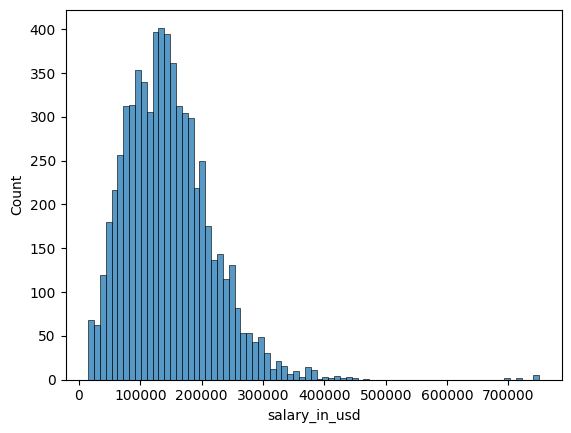

In [14]:
sns.histplot(data=df,x="salary_in_usd")

<Axes: xlabel='salary_in_usd'>

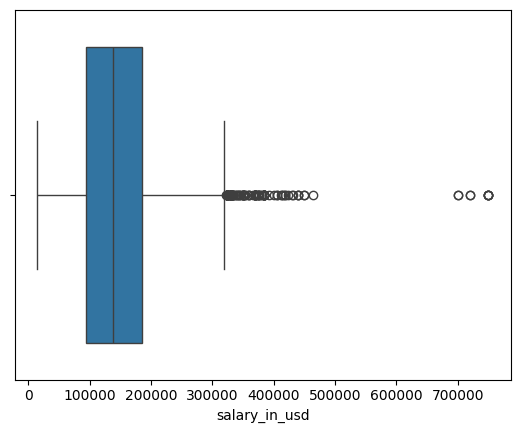

In [15]:
sns.boxplot(data=df,x="salary_in_usd")

In [16]:
## Outlier Treatment
def wisker(col):
    q1,q3=np.percentile(col,(25,75))
    iqr=q3-q1
    lw=q1 -0.5*iqr
    up=q3+0.5*iqr
    return lw,up

In [17]:
wisker(df["salary_in_usd"])

(np.float64(50000.0), np.float64(230000.0))

In [18]:
for i in ["salary_in_usd"]:
    lw,up=wisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>up,up,df[i])

<Axes: xlabel='salary_in_usd'>

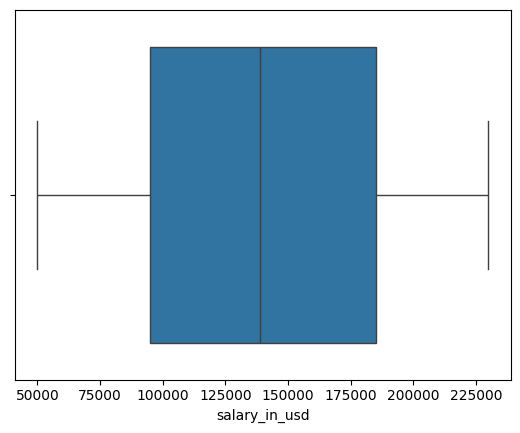

In [19]:
sns.boxplot(data=df,x="salary_in_usd")

In [20]:
encoder=LabelEncoder()
category=df.select_dtypes(include=["object","category"])
for x in category:
    df[x]=encoder.fit_transform(df[x])
df.head()


,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,46,2,2,2,1970,84,148100,20,148100.0,73,1
1,46,2,2,2,1970,84,98700,20,98700.0,73,1
2,73,3,2,2,1970,84,140032,20,140032.0,73,1
3,73,3,2,2,1970,84,100022,20,100022.0,73,1
4,19,2,2,1,1970,84,120000,20,120000.0,73,1


In [21]:
x=df.drop(["salary_in_usd"],axis=1)     ## INDEPENDENT
y=df["salary_in_usd"]   ##DEPENDENT

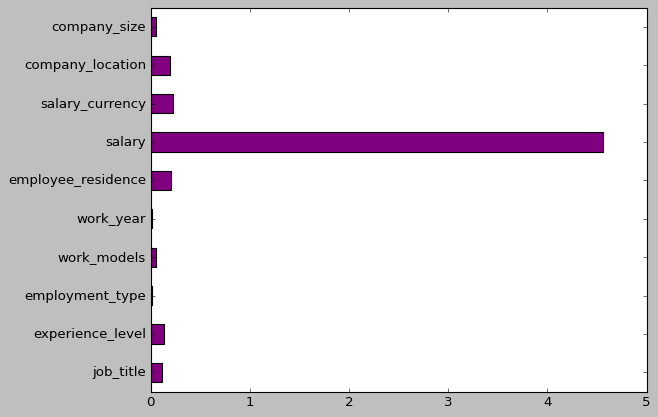

In [22]:
plt.style.use("classic")
importance=mutual_info_regression(x,y)
feature_im=pd.Series(importance,x.columns[0:len(x.columns)])
feature_im.plot(kind="barh",color="purple")
plt.show()

In [23]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.20,random_state=1)

In [24]:
xtrain.shape

(5279, 10)

In [25]:
line_reg=Pipeline([("standard",StandardScaler()),("Regression Model",LinearRegression())])
decision=Pipeline([("standard",StandardScaler()),("Regression Model",DecisionTreeRegressor())])
forest=Pipeline([("standard",StandardScaler()),("Regression Model",RandomForestRegressor())])

In [26]:
line_reg.fit(xtrain,ytrain)

Pipeline(steps=[('standard', StandardScaler()),
                ('Regression Model', LinearRegression())])

In [27]:
pred1=line_reg.predict(xtest)
pred1

array([162843.38200521, 141815.11459859, 173471.63798458, ...,
       161872.50793467, 177183.67902263, 152654.90808466])

In [28]:
print("MAE",mean_absolute_error(ytest,pred1))
print("MAPE",mean_absolute_percentage_error(ytest,pred1))
print("MSE",mean_squared_error(ytest,pred1))
print("R2 SCORE",r2_score(ytest,pred1))

MAE 38752.47749978437
MAPE 0.34448127955015523
MSE 2190283020.67573
R2 SCORE 0.27416996621006284


In [29]:
decision.fit(xtrain,ytrain)

Pipeline(steps=[('standard', StandardScaler()),
                ('Regression Model', DecisionTreeRegressor())])

In [30]:
pred2=decision.predict(xtest)
pred2

array([230000., 175000., 222000., ..., 230000.,  64000., 110000.])

In [31]:
print("MAE",mean_absolute_error(ytest,pred2))
print("MAPE",mean_absolute_percentage_error(ytest,pred2))
print("MSE",mean_squared_error(ytest,pred2))
print("R2 SCORE",r2_score(ytest,pred2))

MAE 606.5079545454546
MAPE 0.007038221472275419
MSE 54571463.312310606
R2 SCORE 0.9819157585179469


In [32]:
forest.fit(xtrain,ytrain)

Pipeline(steps=[('standard', StandardScaler()),
                ('Regression Model', RandomForestRegressor())])

In [33]:
pred3=forest.predict(xtest)
pred3

array([230000.  , 175000.  , 222006.39, ..., 230000.  ,  63952.  ,
       110000.  ])

In [34]:
print("MAE",mean_absolute_error(ytest,pred3))
print("MAPE",mean_absolute_percentage_error(ytest,pred3))
print("MSE",mean_squared_error(ytest,pred3))
print("R2 SCORE",r2_score(ytest,pred3))

MAE 741.3410306186871
MAPE 0.008652358212812948
MSE 57061743.73607491
R2 SCORE 0.9810905134208225
